# Python for Data Analysis

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from matplotlib import pyplot as plt

## Python basics

In [1]:
a = 5

In [2]:
a

5

In [3]:
an_apple = "apple"

In [4]:
an_example = "example"

In [8]:
b = [3,2,5]

In [19]:
b.sort(reverse=True)

In [20]:
b

[5, 3, 2]

In [21]:
b.sort?

In [4]:
import bisect

c = [1,2,2,2,3,4,7]
print(f'Element should be inserted to keep it sorted to the possition with index: {bisect.bisect(c, 2)}')

bisect.insort(c, 5)
print(c)

Element should be inserted to keep it sorted to the possition with index: 4
[1, 2, 2, 2, 3, 4, 5, 7]


In [11]:
some_list = ['foo', 'bar', 'baz']
mapping = {}

for i, v in enumerate(some_list):
    mapping[v] = i
    
print(mapping)

{'foo': 0, 'bar': 1, 'baz': 2}


In [13]:
seq1 = ['foo', 'bar', 'baz']
seq2 = ['one', 'two', 'three']

zipped = zip(seq1, seq2)

print(list(zipped))

[('foo', 'one'), ('bar', 'two'), ('baz', 'three')]


In [16]:
pitchers = [('Nolan', 'Ryan'), ('Roger', 'Clemens'), ('Curt', 'Schilling')]

first_names, last_names = zip(*pitchers)

print(first_names)
print(last_names)

('Nolan', 'Roger', 'Curt')
('Ryan', 'Clemens', 'Schilling')


In [17]:
mapping = dict(zip(range(5), reversed(range(5))))

print(mapping)

{0: 4, 1: 3, 2: 2, 3: 1, 4: 0}


In [19]:
words = ['apple', 'bat', 'bar', 'atom', 'book']
by_letter = {}

for word in words:
    letter = word[0]
    by_letter.setdefault(letter, []).append(word)
    
    
print(by_letter)

{'a': ['apple', 'atom'], 'b': ['bat', 'bar', 'book']}


In [22]:
import re


def remove_punctuation(value):
    return re.sub('[!#?]', '', value)

clean_ops = [str.strip, remove_punctuation, str.title]

def clean_strings(strings, ops):
    result = []
    for value in strings:
        for function in ops:
            value = function(value)
        result.append(value)
    return result


states = ['    Alabama ', 'Georgia!', 'Georgia', 'georgia', 'FlOrIda', 'south    carolina##', 'West virinia?']

print(clean_strings(states, clean_ops))

['Alabama', 'Georgia', 'Georgia', 'Georgia', 'Florida', 'South    Carolina', 'West Virinia']


In [1]:
def apply_to_list(some_list, f):
    return [f(x) for x in some_list]


ints = [4, 0, 1, 5, 6]
print(apply_to_list(ints, lambda x: x * 2))

[8, 0, 2, 10, 12]


In [5]:
def add_numbers(x, y):
    return x + y


add_five = lambda y: add_numbers(5, y)

print(add_five(3))

8


In [11]:
def squares(n=10):
    print('Generating squares from 1 to {0}'.format(n ** 2))
    for i in range(1, n+1):
        yield i**2
        

gen = squares(12)
print(gen)

for x in gen:
    print(x, end=' ')


<generator object squares at 0x0000026676B01AC0>
Generating squares from 1 to 144
1 4 9 16 25 36 49 64 81 100 121 144 

In [12]:
print(sum(x ** 2 for x in range(100)))

print(dict((i, i**2) for i in range(5)))

328350
{0: 0, 1: 1, 2: 4, 3: 9, 4: 16}


In [15]:
import itertools

first_letter = lambda x: x[0]
names = ['Alan', 'Adam', 'Wes', 'Will', 'Albert', 'Steven']

for letter, names in itertools.groupby(names, first_letter):
    print(letter, list(names))

A ['Alan', 'Adam']
W ['Wes', 'Will']
A ['Albert']
S ['Steven']


In [ ]:
f = open(path, 'w')

try:
    write_to_file(f)
except:
    print('Failed')
else:
    print('Succeeded')
finally:
    f.close()

In [17]:
import sys

print(sys.getdefaultencoding())

utf-8


## NumPy

In [2]:
#Perfomance differance
import numpy as np

my_arr = np.arange(1000000)
my_list = list(range(1000000))

%time for _ in range(10): my_arr2 = my_arr * 2
%time for _ in range(10): my_list2 = [x * 2 for x in my_list]    

Wall time: 18 ms
Wall time: 870 ms


In [3]:
#Batch computations with similar syntax
import numpy as np

data = np.random.randn(2, 3)
print(data)

print(data * 10)

print(data + data)

[[-0.06585879  1.12063399 -0.50747201]
 [-0.13468381  1.46437142  0.78189358]]
[[-0.6585879  11.20633989 -5.07472013]
 [-1.3468381  14.64371418  7.81893582]]
[[-0.13171758  2.24126798 -1.01494403]
 [-0.26936762  2.92874284  1.56378716]]


In [4]:
#Creating ndarrays
data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
print(arr1)

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
print(arr2)

[6.  7.5 8.  0.  1. ]
[[1 2 3 4]
 [5 6 7 8]]


In [5]:
print(np.zeros(10))

print(np.zeros((3, 6)))

print(np.empty((2, 3, 2)))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0.]]
[[[9.73568888e-312 3.16202013e-322]
  [0.00000000e+000 0.00000000e+000]
  [1.42413554e-306 1.02380741e+166]]

 [[3.24741781e-057 6.57931922e-038]
  [1.19991893e-071 1.03136782e+166]
  [1.46577812e-075 5.64341321e-062]]]


In [6]:
#Convert data types
arr = np.array([3.7, -1.2, -2.6, 0.5, 12.9, 10.1])
print(arr)

print(arr.astype(np.int32))

int_arr = np.arange(10)
print(int_arr.astype(arr.dtype))

[ 3.7 -1.2 -2.6  0.5 12.9 10.1]
[ 3 -1 -2  0 12 10]
[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]


In [7]:
#Arithmetic with NumPy
arr = np.array([[1., 2., 3.], [4., 5., 6.]])
arr2 = np.array([[0., 4., 1.], [7., 2., 12.]])

print(arr)
print()
print(arr * arr)
print()
print(arr - arr)
print('-'*25)
print(1 / arr)
print(arr ** 0.5)
print('-'*25)
print(arr2)
print()
print(arr2 > arr)

[[1. 2. 3.]
 [4. 5. 6.]]

[[ 1.  4.  9.]
 [16. 25. 36.]]

[[0. 0. 0.]
 [0. 0. 0.]]
-------------------------
[[1.         0.5        0.33333333]
 [0.25       0.2        0.16666667]]
[[1.         1.41421356 1.73205081]
 [2.         2.23606798 2.44948974]]
-------------------------
[[ 0.  4.  1.]
 [ 7.  2. 12.]]

[[False  True False]
 [ True False  True]]


In [14]:
arr = np.arange(10)
sub = [1, 1, 1]

sub = arr[3:6]
sub[1] = 0

print(arr)
print(sub)

[0 1 2 3 0 5 6 7 8 9]
[3 0 5]


In [15]:
#Multi-dimenscional arrays
arr2d = np.array([[1,2,3], [4,5,6], [7,8,9]])

print(arr2d[2])
print()
print(arr2d[0][2])
print(arr2d[0, 2])
print()

[7 8 9]

3
3



In [18]:
#Indexing with slices
print(arr2d)
print()
print(arr2d[:2])
print()
print(arr2d[:2, 1:])
print()
print(arr2d[1, :2])
print()
print(arr2d[:2, 2])
print()
print(arr2d[:, :1])
print()
arr2d[:2, 1:] = 0
print(arr2d)

[[1 2 3]
 [4 5 6]
 [7 8 9]]

[[1 2 3]
 [4 5 6]]

[[2 3]
 [5 6]]

[4 5]

[3 6]

[[1]
 [4]
 [7]]

[[1 0 0]
 [4 0 0]
 [7 8 9]]


In [26]:
#Boolean indexing
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'Joe'])
data = np.random.randn(7, 4)

print(names)
print(data)
print()
print(names == 'Bob')
print()
print(data[names == 'Bob'])
print()
print(data[names == 'Bob', 2:])
print()
print(data[names == 'Bob', 3])
print()
cond = names == 'Bob'
print(data[~(cond)])
print()
mask = (names == 'Bob') | (names == 'Will')
print(data[mask])
print()
data[data < 0] = 0
print(data)
print()
data[names != 'Joe'] = 7
print(data)

['Bob' 'Joe' 'Will' 'Bob' 'Will' 'Joe' 'Joe']
[[-0.16699568  0.06760153 -0.06911835 -0.04601618]
 [-2.1336573  -0.57354825  1.08201325  0.19101737]
 [-0.47312195 -0.52820697  1.28187227  1.28936265]
 [ 0.05725418  0.40692873 -1.25338231 -1.54271833]
 [-0.05174254 -0.98483893 -0.75724903 -0.01967147]
 [-0.03822197 -2.09631178  0.63994131  0.23880735]
 [-0.61122828 -0.04851824  0.90401664 -1.0177254 ]]

[ True False False  True False False False]

[[-0.16699568  0.06760153 -0.06911835 -0.04601618]
 [ 0.05725418  0.40692873 -1.25338231 -1.54271833]]

[[-0.06911835 -0.04601618]
 [-1.25338231 -1.54271833]]

[-0.04601618 -1.54271833]

[[-2.1336573  -0.57354825  1.08201325  0.19101737]
 [-0.47312195 -0.52820697  1.28187227  1.28936265]
 [-0.05174254 -0.98483893 -0.75724903 -0.01967147]
 [-0.03822197 -2.09631178  0.63994131  0.23880735]
 [-0.61122828 -0.04851824  0.90401664 -1.0177254 ]]

[[-0.16699568  0.06760153 -0.06911835 -0.04601618]
 [-0.47312195 -0.52820697  1.28187227  1.28936265]
 [ 0

In [29]:
#Fancy indexing
arr = np.empty((8, 4))

for i in range(8):
    arr[i] = i

print(arr)
print()
print(arr[[4, 3, 0, 6]])
print()
print(arr[[-3, -5, -7]])

[[0. 0. 0. 0.]
 [1. 1. 1. 1.]
 [2. 2. 2. 2.]
 [3. 3. 3. 3.]
 [4. 4. 4. 4.]
 [5. 5. 5. 5.]
 [6. 6. 6. 6.]
 [7. 7. 7. 7.]]

[[4. 4. 4. 4.]
 [3. 3. 3. 3.]
 [0. 0. 0. 0.]
 [6. 6. 6. 6.]]

[[5. 5. 5. 5.]
 [3. 3. 3. 3.]
 [1. 1. 1. 1.]]


In [31]:
arr = np.arange(32).reshape((8, 4))

print(arr)
print()
print(arr[[1, 5, 7, 2], [0, 3, 1, 2]])
print()
print(arr[[1, 5, 7, 2]][:, [0, 3, 1, 2]])

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]
 [16 17 18 19]
 [20 21 22 23]
 [24 25 26 27]
 [28 29 30 31]]

[ 4 23 29 10]

[[ 4  7  5  6]
 [20 23 21 22]
 [28 31 29 30]
 [ 8 11  9 10]]


In [32]:
#Transposing Arrays
arr = np.arange(15).reshape((3, 5))

print(arr)
print()
print(arr.T)

[[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]]

[[ 0  5 10]
 [ 1  6 11]
 [ 2  7 12]
 [ 3  8 13]
 [ 4  9 14]]


In [34]:
#Fast Element-wise array functions
arr = np.arange(10)

print(arr)
print()
print(np.sqrt(arr))
print()
print(np.exp(arr))

[0 1 2 3 4 5 6 7 8 9]

[0.         1.         1.41421356 1.73205081 2.         2.23606798
 2.44948974 2.64575131 2.82842712 3.        ]

[1.00000000e+00 2.71828183e+00 7.38905610e+00 2.00855369e+01
 5.45981500e+01 1.48413159e+02 4.03428793e+02 1.09663316e+03
 2.98095799e+03 8.10308393e+03]


In [41]:
#sqrt(x^2 * y^2)
points = np.arange(-5, 5, 0.01)

xs, ys = np.meshgrid(points, points)

print(xs)
print()
print(ys)
print("-"*75)

z = np.sqrt(xs ** 2 + ys ** 2)
print(z)

[[-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 ...
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]
 [-5.   -4.99 -4.98 ...  4.97  4.98  4.99]]

[[-5.   -5.   -5.   ... -5.   -5.   -5.  ]
 [-4.99 -4.99 -4.99 ... -4.99 -4.99 -4.99]
 [-4.98 -4.98 -4.98 ... -4.98 -4.98 -4.98]
 ...
 [ 4.97  4.97  4.97 ...  4.97  4.97  4.97]
 [ 4.98  4.98  4.98 ...  4.98  4.98  4.98]
 [ 4.99  4.99  4.99 ...  4.99  4.99  4.99]]
---------------------------------------------------------------------------
[[7.07106781 7.06400028 7.05693985 ... 7.04988652 7.05693985 7.06400028]
 [7.06400028 7.05692568 7.04985815 ... 7.04279774 7.04985815 7.05692568]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 ...
 [7.04988652 7.04279774 7.03571603 ... 7.0286414  7.03571603 7.04279774]
 [7.05693985 7.04985815 7.04278354 ... 7.03571603 7.04278354 7.04985815]
 [7.06400028 7.05692568 7

Text(0.5, 1.0, 'Image plot of $\\sqrt{x^2 + y^2}$ for a grid of values')

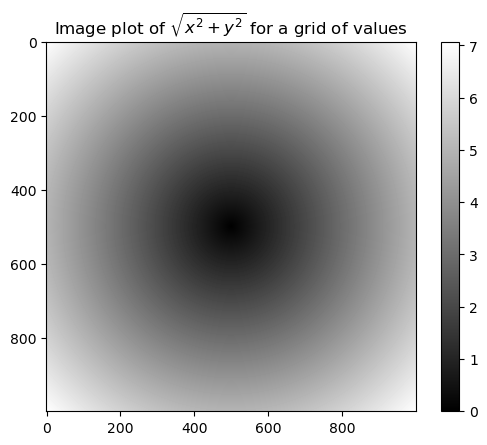

In [42]:
import matplotlib.pyplot as plt

plt.imshow(z, cmap=plt.cm.gray)
plt.colorbar()
plt.title("Image plot of $\sqrt{x^2 + y^2}$ for a grid of values")

In [3]:
import numpy as np

xarr = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
yarr = np.array([2.1, 2.2, 2.3, 2.4, 2.5])
cond = np.array([True, False, True, True, False])

result = [(x if c else y) for x, y, c in zip(xarr, yarr, cond)]
print(result)

result = np.where(cond, xarr, yarr)
print(result)

print()

arr = np.random.randn(4, 4)
print(arr > 0)
print(np.where(arr > 0, 2, -2))
print(np.where(arr > 0, 2, arr))

[1.1, 2.2, 1.3, 1.4, 2.5]
[1.1 2.2 1.3 1.4 2.5]

[[ True False  True False]
 [ True  True  True  True]
 [False  True  True  True]
 [False  True False  True]]
[[ 2 -2  2 -2]
 [ 2  2  2  2]
 [-2  2  2  2]
 [-2  2 -2  2]]
[[ 2.         -1.27270411  2.         -0.92713598]
 [ 2.          2.          2.          2.        ]
 [-0.10184108  2.          2.          2.        ]
 [-0.47273129  2.         -0.96016831  2.        ]]


In [5]:
#Math and Statistical methods
arr = np.random.randn(5, 4)

print(arr)
print()
print(arr.mean())
print(np.mean(arr))
print(arr.sum())
print()
print(arr.mean(axis=1)) # compute across the columns
print(arr.sum(axis=0))  # compute down the row

[[ 0.1081174   0.80094387 -0.20570512  1.32495194]
 [ 0.73645765  0.28625532  0.96148918 -1.10574605]
 [ 1.19419156 -0.06323429 -0.88971612 -1.01683782]
 [-0.56544364 -0.9338016   0.13804541  0.30900305]
 [ 0.22480374  1.64070619 -0.88223376  1.19768989]]

0.16299683931148146
0.16299683931148146
3.259936786229629

[ 0.50707702  0.21961403 -0.19389917 -0.26304919  0.54524151]
[ 1.69812671  1.73086949 -0.87812041  0.70906101]


In [6]:
arr = np.array([[0, 1, 2], [3, 4, 5], [6, 7, 8]])

print(arr)
print()
print(arr.cumsum(axis=0))
print()
print(arr.cumprod(axis=1))

[[0 1 2]
 [3 4 5]
 [6 7 8]]

[[ 0  1  2]
 [ 3  5  7]
 [ 9 12 15]]

[[  0   0   0]
 [  3  12  60]
 [  6  42 336]]


In [7]:
#Methods of Boolean Arrays
arr = np.random.randn(100)

print((arr > 0).sum())
print()

bools = np.array([False, False, True, False])

print(bools.any())
print(bools.all())

48

True
False


In [8]:
#Set logic
ints = np.array([3,3,3,2,2,1,1,4,4])
print(np.unique(ints))
print()

values = np.array([6, 0, 0, 3, 2, 5, 6])
print(np.in1d(values, [2, 3, 6]))

[1 2 3 4]

[ True False False  True  True False  True]


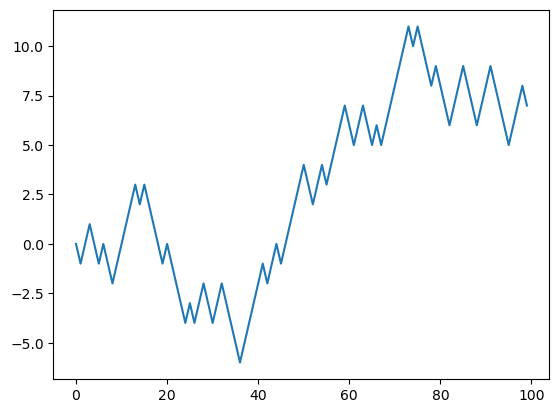

In [13]:
#Random Walks pure
import random
from matplotlib import pyplot as plt

position = 0
walk = [position]
steps = 1000

for i in range(steps):
    step = 1 if random.randint(0, 1) else -1
    position += step
    walk.append(position)
    
plt.plot(walk[:100])

-30
15
67


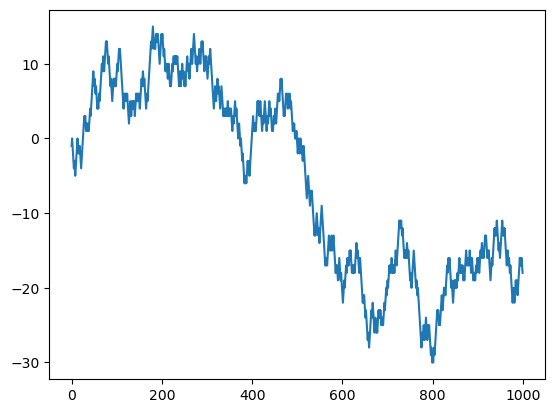

In [19]:
#Random Walks NumPy
nsteps = 1000
draws = np.random.randint(0, 2, size=nsteps)
steps = np.where(draws > 0, 1, -1)
walk = steps.cumsum()

plt.plot(walk[:])

print(walk.min())
print(walk.max())
print((np.abs(walk) >= 10).argmax())

In [20]:
#Simutating Many Random Walks at once
nwalks = 5000
nsteps = 1000

draws = np.random.randint(0, 2, size=(nwalks, nsteps)) # 0 or 1
steps = np.where(draws > 0, 1, -1)
walks = steps.cumsum(1)

print(walks)

[[ -1   0  -1 ... -32 -33 -32]
 [  1   2   3 ... -54 -55 -56]
 [ -1  -2  -1 ...  36  35  34]
 ...
 [  1   0  -1 ... -12 -13 -14]
 [  1   2   3 ... -24 -25 -24]
 [ -1   0  -1 ...   8   7   8]]


In [22]:
print(walks.max())
print(walks.min())
print()

hits30 = (np.abs(walks) >= 30).any(1)
print(hits30)
print(hits30.sum())

119
-123

[ True  True  True ...  True  True  True]
3378


## Pandas

### Series

In [13]:
obj = Series([4, 7, -5, 3])
print(obj)
print(obj.values)
print(obj.index)

0    4
1    7
2   -5
3    3
dtype: int64
[ 4  7 -5  3]
RangeIndex(start=0, stop=4, step=1)


In [14]:
obj2 = Series([4, 7, -5, 3], index=['d', 'b', 'a', 'c'])
print(obj2)
print(obj2.index)

d    4
b    7
a   -5
c    3
dtype: int64
Index(['d', 'b', 'a', 'c'], dtype='object')


In [15]:
print(obj2['a'])
obj2['d'] = 6
print(obj2[['c', 'a', 'd']])

-5
c    3
a   -5
d    6
dtype: int64


In [16]:
print(obj2[obj2 > 0])
print(obj2 * 2)
print(np.exp(obj2))

d    6
b    7
c    3
dtype: int64
d    12
b    14
a   -10
c     6
dtype: int64
d     403.428793
b    1096.633158
a       0.006738
c      20.085537
dtype: float64


In [17]:
print('b' in obj2)
print('e' in obj2)

True
False


In [18]:
#Dict to Series
sdata = {'Ohio': 35000, 'Texas': 71000, 'Oregon': 16000, 'Utah': 5000}
obj3 = Series(sdata)
print(obj3)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64


In [19]:
#Override result Series
states = ['California', 'Ohio', 'Oregon', 'Texas']
obj4 = Series(sdata, index=states)
print(obj4)

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64


In [20]:
#Missing data
print(pd.isnull(obj4))
print(pd.notnull(obj4))
print(obj4.isnull())

California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool
California    False
Ohio           True
Oregon         True
Texas          True
dtype: bool
California     True
Ohio          False
Oregon        False
Texas         False
dtype: bool


In [21]:
#Arithmetic operations
print(obj3)
print()
print(obj4)
print()
print(obj3 + obj4)

Ohio      35000
Texas     71000
Oregon    16000
Utah       5000
dtype: int64

California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
dtype: float64

California         NaN
Ohio           70000.0
Oregon         32000.0
Texas         142000.0
Utah               NaN
dtype: float64


In [22]:
obj4.name = 'population'
obj4.index.name = 'state'
print(obj4)

state
California        NaN
Ohio          35000.0
Oregon        16000.0
Texas         71000.0
Name: population, dtype: float64


In [23]:
print(obj)
obj.index = ['Bob', 'Steve', 'Jeff', 'Ryan']
print(obj)

0    4
1    7
2   -5
3    3
dtype: int64
Bob      4
Steve    7
Jeff    -5
Ryan     3
dtype: int64


### DataFrame

In [26]:
data = {'state': ['Ohio', 'Ohio', 'Ohio', 'Nevada', 'Nevada', 'Nevada'],
       'year': [2000, 2001, 2002, 2001, 2002, 2003],
       'pop': [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
frame = DataFrame(data)

In [25]:
frame

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9
5,Nevada,2003,3.2


In [27]:
frame.head() # top 5 rows

,state,year,pop
0,Ohio,2000,1.5
1,Ohio,2001,1.7
2,Ohio,2002,3.6
3,Nevada,2001,2.4
4,Nevada,2002,2.9


In [28]:
DataFrame(data, columns=['year', 'state', 'pop']) # specify a sequence of columns

,year,state,pop
0,2000,Ohio,1.5
1,2001,Ohio,1.7
2,2002,Ohio,3.6
3,2001,Nevada,2.4
4,2002,Nevada,2.9
5,2003,Nevada,3.2


In [32]:
frame2 = DataFrame(data, columns=['year', 'state', 'pop', 'debt'],
                  index=['one', 'two', 'three', 'four', 'five', 'six']) # columns more then data

In [33]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,NaN
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,NaN
five,2002,Nevada,2.9,NaN
six,2003,Nevada,3.2,NaN


In [34]:
frame2['state']

one        Ohio
two        Ohio
three      Ohio
four     Nevada
five     Nevada
six      Nevada
Name: state, dtype: object

In [35]:
frame2.year

one      2000
two      2001
three    2002
four     2001
five     2002
six      2003
Name: year, dtype: int64

In [36]:
frame2.loc['three'] # retrive rows by position or name

year     2002
state    Ohio
pop       3.6
debt      NaN
Name: three, dtype: object

In [37]:
frame2['debt'] = 16.5 # Modify columns by assignment

In [38]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,16.5
two,2001,Ohio,1.7,16.5
three,2002,Ohio,3.6,16.5
four,2001,Nevada,2.4,16.5
five,2002,Nevada,2.9,16.5
six,2003,Nevada,3.2,16.5


In [39]:
frame2['debt'] = np.arange(6.)

In [40]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,0.0
two,2001,Ohio,1.7,1.0
three,2002,Ohio,3.6,2.0
four,2001,Nevada,2.4,3.0
five,2002,Nevada,2.9,4.0
six,2003,Nevada,3.2,5.0


In [41]:
val = Series([-1.2, -1.5, -1.7], index=['two', 'four', 'five'])
frame2['debt'] = val

In [42]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [43]:
frame2['eastern'] = frame2.state == 'Ohio' # Add column with bool

In [44]:
frame2

,year,state,pop,debt,eastern
one,2000,Ohio,1.5,NaN,True
two,2001,Ohio,1.7,-1.2,True
three,2002,Ohio,3.6,NaN,True
four,2001,Nevada,2.4,-1.5,False
five,2002,Nevada,2.9,-1.7,False
six,2003,Nevada,3.2,NaN,False


In [45]:
del frame2['eastern'] # Deleting column

In [46]:
frame2

,year,state,pop,debt
one,2000,Ohio,1.5,NaN
two,2001,Ohio,1.7,-1.2
three,2002,Ohio,3.6,NaN
four,2001,Nevada,2.4,-1.5
five,2002,Nevada,2.9,-1.7
six,2003,Nevada,3.2,NaN


In [50]:
pop = {'Nevada': {2001: 2.4, 2002: 2.9},
      'Ohio': {2000: 1.5, 2001: 1.7, 2002: 3.6}}
frame3 = DataFrame(pop)

In [51]:
frame3

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [52]:
frame3.T

,2001,2002,2000
Nevada,2.4,2.9,NaN
Ohio,1.7,3.6,1.5


In [53]:
DataFrame(pop, index=[2001, 2002, 2003])

,Nevada,Ohio
2001,2.4,1.7
2002,2.9,3.6
2003,NaN,NaN


In [59]:
pdata = {'Ohio': frame3['Ohio'][:-1],
        'Nevada': frame3['Nevada'][:2]}

In [60]:
DataFrame(pdata)

,Ohio,Nevada
2001,1.7,2.4
2002,3.6,2.9


In [61]:
frame3.index.name = 'year'; frame3.columns.name = 'state'

In [62]:
frame3

state,Nevada,Ohio
year,,
2001,2.4,1.7
2002,2.9,3.6
2000,NaN,1.5


In [63]:
frame3.values

array([[2.4, 1.7],
       [2.9, 3.6],
       [nan, 1.5]])

### Reindexing

In [2]:
obj = Series([4.5, 7.2, -5.3, 3.6], index=['d', 'b', 'a', 'c']) # simple reindex

In [3]:
obj

d    4.5
b    7.2
a   -5.3
c    3.6
dtype: float64

In [4]:
obj2 = obj.reindex(['a', 'b', 'c', 'd', 'e'])

In [5]:
obj2

a   -5.3
b    7.2
c    3.6
d    4.5
e    NaN
dtype: float64

In [6]:
obj3 = Series(['blue', 'purple', 'yellow'], index=[0, 2, 4]) # ffill reindex

In [7]:
obj3

0      blue
2    purple
4    yellow
dtype: object

In [8]:
obj3.reindex(range(6), method='ffill')

0      blue
1      blue
2    purple
3    purple
4    yellow
5    yellow
dtype: object

In [10]:
frame = DataFrame(np.arange(9).reshape((3, 3)), 
                 index=['a', 'c', 'd'],
                 columns=['Ohio', 'Texas', 'California']) # DataFrame reindex

In [11]:
frame

,Ohio,Texas,California
a,0,1,2
c,3,4,5
d,6,7,8


In [12]:
frame2 = frame.reindex(['a', 'b', 'c', 'd'])

In [13]:
frame2

,Ohio,Texas,California
a,0.0,1.0,2.0
b,NaN,NaN,NaN
c,3.0,4.0,5.0
d,6.0,7.0,8.0


In [29]:
states = ['Texas', 'Utah', 'California'] # reindexing with keywords

In [30]:
frame.reindex(columns=states)

,Texas,Utah,California
a,1,NaN,2
c,4,NaN,5
d,7,NaN,8


### Dropping Entries from an Axis

In [31]:
obj = Series(np.arange(5.), index=['a', 'b', 'c', 'd', 'e']) # simple axis drop

In [32]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
e    4.0
dtype: float64

In [33]:
obj.drop(['d', 'c']) 

a    0.0
b    1.0
e    4.0
dtype: float64

In [35]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                index=['Ohio', 'Colorado', 'Utah', 'New York'],
                columns=['one', 'two', 'three', 'four'])

In [36]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [37]:
data.drop(['Colorado', 'Ohio']) # drop for the row

,one,two,three,four
Utah,8,9,10,11
New York,12,13,14,15


In [43]:
data.drop('two', axis=1) # drop for the columns

,one,three,four
Ohio,0,2,3
Colorado,4,6,7
Utah,8,10,11
New York,12,14,15


In [44]:
data.drop(['two', 'four'], axis='columns')

,one,three
Ohio,0,2
Colorado,4,6
Utah,8,10
New York,12,14


In [46]:
obj.drop('c', inplace=True) # inplace drop

In [47]:
obj

a    0.0
b    1.0
d    3.0
e    4.0
dtype: float64

### Indexing, Selection and Filtering 

In [48]:
obj = Series(np.arange(4.), index=['a', 'b', 'c', 'd']) # Series's index values

In [49]:
obj

a    0.0
b    1.0
c    2.0
d    3.0
dtype: float64

In [50]:
obj['b']

1.0

In [51]:
obj[1]

1.0

In [52]:
obj[2:4]

c    2.0
d    3.0
dtype: float64

In [53]:
obj[['b', 'a', 'd']]

b    1.0
a    0.0
d    3.0
dtype: float64

In [54]:
obj[[1, 3]]

b    1.0
d    3.0
dtype: float64

In [55]:
obj[obj < 2]

a    0.0
b    1.0
dtype: float64

In [56]:
obj['b':'c'] # Slicing with labels

b    1.0
c    2.0
dtype: float64

In [57]:
obj['b':'c'] = 5 # Setting with labels

In [58]:
obj

a    0.0
b    5.0
c    5.0
d    3.0
dtype: float64

In [59]:
data = DataFrame(np.arange(16).reshape((4, 4)),
                index=['Ohio', 'Colorado', 'Utah', 'New York'],
                columns=['one', 'two', 'three', 'four'])  # DataFrame indexing

In [60]:
data

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [61]:
data['two']

Ohio         1
Colorado     5
Utah         9
New York    13
Name: two, dtype: int32

In [62]:
data[['three', 'one']]

,three,one
Ohio,2,0
Colorado,6,4
Utah,10,8
New York,14,12


In [65]:
data[:2] # Slicing and selecting with boolean array

,one,two,three,four
Ohio,0,1,2,3
Colorado,4,5,6,7


In [66]:
data[data['three'] > 5]

,one,two,three,four
Colorado,4,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


In [70]:
data < 5 # Indexing with bool

,one,two,three,four
Ohio,True,True,True,True
Colorado,True,False,False,False
Utah,False,False,False,False
New York,False,False,False,False


In [71]:
data[data < 5] = 0

In [72]:
data

,one,two,three,four
Ohio,0,0,0,0
Colorado,0,5,6,7
Utah,8,9,10,11
New York,12,13,14,15


### Selection with loc and iloc

In [74]:
data.loc['Colorado', ['two', 'three']] # Preliminary example

two      5
three    6
Name: Colorado, dtype: int32

In [76]:
data.iloc[2, [3, 0, 1]] # Selection with int

four    11
one      8
two      9
Name: Utah, dtype: int32

In [77]:
data.iloc[2]

one       8
two       9
three    10
four     11
Name: Utah, dtype: int32

In [78]:
data.iloc[[1, 2], [3, 0, 1]]

,four,one,two
Colorado,7,0,5
Utah,11,8,9


In [79]:
data.loc[:'Utah', 'two'] # Indexing funcs with slices

Ohio        0
Colorado    5
Utah        9
Name: two, dtype: int32

In [80]:
data.iloc[:, :3][data.three > 5]

,one,two,three
Colorado,0,5,6
Utah,8,9,10
New York,12,13,14


### Arithmetic and Data Alignment 

In [90]:
s1 = Series([7.3, -2.5, 3.4, 1.5], index=['a', 'c', 'd', 'e']) # Adding different Series
s2 = Series([-2.1, 3.6, -1.5, 4, 3.1], index=['a', 'c', 'e', 'f', 'g']) 

In [91]:
s1

a    7.3
c   -2.5
d    3.4
e    1.5
dtype: float64

In [92]:
s2

a   -2.1
c    3.6
e   -1.5
f    4.0
g    3.1
dtype: float64

In [93]:
s1 + s2

a    5.2
c    1.1
d    NaN
e    0.0
f    NaN
g    NaN
dtype: float64

In [97]:
df1 = DataFrame(np.arange(9.).reshape((3, 3)), columns=list('bcd'),
               index=['Ohio', 'Texas', 'Colorado'])
df2 = DataFrame(np.arange(12.).reshape((4, 3)), columns=list('bde'),
               index=['Utah', 'Ohio', 'Texas', 'Oregon'])   # Adding different DataFrames

In [98]:
df1

,b,c,d
Ohio,0.0,1.0,2.0
Texas,3.0,4.0,5.0
Colorado,6.0,7.0,8.0


In [99]:
df2

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [100]:
df1 + df2

,b,c,d,e
Colorado,NaN,NaN,NaN,NaN
Ohio,3.0,NaN,6.0,NaN
Oregon,NaN,NaN,NaN,NaN
Texas,9.0,NaN,12.0,NaN
Utah,NaN,NaN,NaN,NaN


### Arithmetic methods with fill values

In [101]:
df1 = DataFrame(np.arange(12.).reshape((3, 4)),
               columns=list('abcd'))
df2 = DataFrame(np.arange(20.).reshape((4, 5)),
               columns=list('abcde'))

In [102]:
df1

,a,b,c,d
0,0.0,1.0,2.0,3.0
1,4.0,5.0,6.0,7.0
2,8.0,9.0,10.0,11.0


In [103]:
df2

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,4.0
1,5.0,6.0,7.0,8.0,9.0
2,10.0,11.0,12.0,13.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [106]:
df2.loc[1, 'b'] = np.nan

In [107]:
df1 + df2

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,NaN
1,9.0,NaN,13.0,15.0,NaN
2,18.0,20.0,22.0,24.0,NaN
3,NaN,NaN,NaN,NaN,NaN


In [108]:
df1.add(df2, fill_value=0)

,a,b,c,d,e
0,0.0,2.0,4.0,6.0,4.0
1,9.0,5.0,13.0,15.0,9.0
2,18.0,20.0,22.0,24.0,14.0
3,15.0,16.0,17.0,18.0,19.0


In [109]:
1 / df1 # Can be flipped

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [110]:
df1.rdiv(1)

,a,b,c,d
0,inf,1.000000,0.500000,0.333333
1,0.250,0.200000,0.166667,0.142857
2,0.125,0.111111,0.100000,0.090909


In [111]:
df1.reindex(columns=df2.columns, fill_value=0) # fill_value with reindexing

,a,b,c,d,e
0,0.0,1.0,2.0,3.0,0
1,4.0,5.0,6.0,7.0,0
2,8.0,9.0,10.0,11.0,0


### Operations between DataFrame and Series

In [116]:
arr = np.arange(12.).reshape((3, 4)) # difference between one and two-dimensional array

In [117]:
arr

array([[ 0.,  1.,  2.,  3.],
       [ 4.,  5.,  6.,  7.],
       [ 8.,  9., 10., 11.]])

In [118]:
arr[0]

array([0., 1., 2., 3.])

In [119]:
arr - arr[0]

array([[0., 0., 0., 0.],
       [4., 4., 4., 4.],
       [8., 8., 8., 8.]])

In [129]:
frame = DataFrame(np.arange(12.).reshape((4, 3)),
                 columns=list('bde'),
                 index=['Utah', 'Ohio', 'Texas', 'Oregon'])
series = frame.iloc[0] # Operations between a DataFrame and a Series

In [130]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [131]:
series

b    0.0
d    1.0
e    2.0
Name: Utah, dtype: float64

In [132]:
frame - series

,b,d,e
Utah,0.0,0.0,0.0
Ohio,3.0,3.0,3.0
Texas,6.0,6.0,6.0
Oregon,9.0,9.0,9.0


In [136]:
series2 = Series(range(3), index=list('bef'))

In [137]:
series2 # not matched

b    0
e    1
f    2
dtype: int64

In [138]:
frame + series2

,b,d,e,f
Utah,0.0,NaN,3.0,NaN
Ohio,3.0,NaN,6.0,NaN
Texas,6.0,NaN,9.0,NaN
Oregon,9.0,NaN,12.0,NaN


In [139]:
series3 = frame['d'] # Broadcast over the columns

In [140]:
frame

,b,d,e
Utah,0.0,1.0,2.0
Ohio,3.0,4.0,5.0
Texas,6.0,7.0,8.0
Oregon,9.0,10.0,11.0


In [142]:
series3 

Utah       1.0
Ohio       4.0
Texas      7.0
Oregon    10.0
Name: d, dtype: float64

In [145]:
frame.sub(series3, axis='index')

,b,d,e
Utah,-1.0,0.0,1.0
Ohio,-1.0,0.0,1.0
Texas,-1.0,0.0,1.0
Oregon,-1.0,0.0,1.0


### Function Application and Mapping

In [149]:
frame = DataFrame(np.random.randn(4, 3), columns=list('bde'),
                 index=['Utah', 'Ohio', 'Texas', 'Oregon']) # NumPy ufuncs work with pandas objects

In [150]:
frame

,b,d,e
Utah,2.217432,1.829496,-1.712336
Ohio,1.651715,1.400687,-0.359474
Texas,-0.470692,-0.515770,-1.539289
Oregon,-1.897020,-0.841596,-1.032662


In [151]:
np.abs(frame)

,b,d,e
Utah,2.217432,1.829496,1.712336
Ohio,1.651715,1.400687,0.359474
Texas,0.470692,0.515770,1.539289
Oregon,1.897020,0.841596,1.032662


In [152]:
f = lambda x: x.max() - x.min() # Applying a function on 1D arrays to each column and row

In [153]:
frame.apply(f) # row

b    4.114452
d    2.671093
e    1.352862
dtype: float64

In [154]:
frame.apply(f, axis='columns') # columns

Utah      3.929768
Ohio      2.011190
Texas     1.068597
Oregon    1.055424
dtype: float64

In [155]:
def f(x):
    return Series([x.min(), x.max()], index=['min', 'max']) # return Series wit multiple values

In [156]:
frame.apply(f)

,b,d,e
min,-1.897020,-0.841596,-1.712336
max,2.217432,1.829496,-0.359474


In [158]:
format = lambda x: '%.2f' % x  # Element-wise Python functions

In [159]:
frame.applymap(format) # mapping for DataFrames

,b,d,e
Utah,2.22,1.83,-1.71
Ohio,1.65,1.40,-0.36
Texas,-0.47,-0.52,-1.54
Oregon,-1.90,-0.84,-1.03


In [161]:
frame['e'].map(format) # mapping for Series

Utah      -1.71
Ohio      -0.36
Texas     -1.54
Oregon    -1.03
Name: e, dtype: object

### Sorting and Ranking

In [162]:
obj = Series(range(4), index=list('dabc')) # sort Series by index

In [163]:
obj.sort_index()

a    1
b    2
c    3
d    0
dtype: int64

In [165]:
frame = DataFrame(np.arange(8).reshape((2, 4)),
                 index=['three', 'one'],
                 columns=list('dabc')) # sort DataFrame by index

In [167]:
frame

,d,a,b,c
three,0,1,2,3
one,4,5,6,7


In [166]:
frame.sort_index()

,d,a,b,c
one,4,5,6,7
three,0,1,2,3


In [168]:
frame.sort_index(axis=1)

,a,b,c,d
three,1,2,3,0
one,5,6,7,4


In [169]:
frame.sort_index(axis=1, ascending=False)

,d,c,b,a
three,0,3,2,1
one,4,7,6,5


In [170]:
obj = Series([4, 7, -3, 2]) # sort Series by values

In [171]:
obj.sort_values()

2   -3
3    2
0    4
1    7
dtype: int64

In [172]:
obj = Series([4, np.nan, 7, np.nan, -3, 2]) # sort with missing val

In [173]:
obj.sort_values()

4   -3.0
5    2.0
0    4.0
2    7.0
1    NaN
3    NaN
dtype: float64

In [174]:
frame = DataFrame({'b': [4, 7, -3, 2], 'a': [0, 1, 0, 1]}) # sort DataFrame by values

In [175]:
frame

,b,a
0,4,0
1,7,1
2,-3,0
3,2,1


In [176]:
frame.sort_values(by='b')

,b,a
2,-3,0
3,2,1
0,4,0
1,7,1


In [177]:
frame.sort_values(by=['a', 'b']) # sort by multiple col

,b,a
2,-3,0
0,4,0
3,2,1
1,7,1


In [190]:
obj = Series([7, -5, 7, 4, 2, 0, 4])

In [191]:
obj.rank()

0    6.5
1    1.0
2    6.5
3    4.5
4    3.0
5    2.0
6    4.5
dtype: float64

In [192]:
obj.rank(method='first')

0    6.0
1    1.0
2    7.0
3    4.0
4    3.0
5    2.0
6    5.0
dtype: float64

In [193]:
obj.rank(ascending=False, method='max') # Assign tie values the max rank in the group

0    2.0
1    7.0
2    2.0
3    4.0
4    5.0
5    6.0
6    4.0
dtype: float64

In [194]:
frame = DataFrame({'b': [4.3, 7, -3, 2], 'a': [0, 1, 0, 1],
                  'c': [-2, 5, 8, -2.5]})  # Ranks DataFrame over the rows or the cols

In [195]:
frame

,b,a,c
0,4.3,0,-2.0
1,7.0,1,5.0
2,-3.0,0,8.0
3,2.0,1,-2.5


In [196]:
frame.rank(axis='columns')

,b,a,c
0,3.0,2.0,1.0
1,3.0,1.0,2.0
2,1.0,2.0,3.0
3,3.0,2.0,1.0


### Axis Indexes with Duplicate Labels

In [197]:
obj = Series(range(5), index=list('aabbc'))

In [198]:
obj

a    0
a    1
b    2
b    3
c    4
dtype: int64

In [199]:
obj.index.is_unique

False

In [200]:
obj['a']

a    0
a    1
dtype: int64

In [201]:
obj['c']

4

In [202]:
df = DataFrame(np.random.rand(4, 3), index=list('aabb'))

In [203]:
df

,0,1,2
a,0.444135,0.689365,0.703322
a,0.039972,0.526131,0.993286
b,0.406932,0.957766,0.351693
b,0.415692,0.684908,0.679123


In [204]:
df.loc['b']

,0,1,2
b,0.406932,0.957766,0.351693
b,0.415692,0.684908,0.679123


### Summarizing and Computing Descriptive Statistics

In [3]:
df = DataFrame([[1.4, np.nan], [7.1, -4.5],
               [np.nan, np.nan], [0.75, -1.3]],
              index=list('abcd'), columns=['one', 'two'])

In [4]:
df

,one,two
a,1.40,NaN
b,7.10,-4.5
c,NaN,NaN
d,0.75,-1.3


In [5]:
df.sum()

one    9.25
two   -5.80
dtype: float64

In [7]:
df.sum(axis='columns')

a    1.40
b    2.60
c    0.00
d   -0.55
dtype: float64

In [8]:
df.sum(axis='columns', skipna=False)

a     NaN
b    2.60
c     NaN
d   -0.55
dtype: float64

In [9]:
df.idxmax()

one    b
two    d
dtype: object

In [10]:
df.cumsum()

,one,two
a,1.40,NaN
b,8.50,-4.5
c,NaN,NaN
d,9.25,-5.8


In [12]:
df.describe() # numeric

,one,two
count,3.000000,2.000000
mean,3.083333,-2.900000
std,3.493685,2.262742
min,0.750000,-4.500000
25%,1.075000,-3.700000
50%,1.400000,-2.900000
75%,4.250000,-2.100000
max,7.100000,-1.300000


In [13]:
obj = Series(list('aabc') * 4)

In [14]:
obj

0     a
1     a
2     b
3     c
4     a
5     a
6     b
7     c
8     a
9     a
10    b
11    c
12    a
13    a
14    b
15    c
dtype: object

In [18]:
obj.describe() # non-numeric

count     16
unique     3
top        a
freq       8
dtype: object

### Unique values, Value Counts and Membership

In [23]:
obj = Series(list('cadaabbcc'))
uniques = obj.unique()

In [24]:
uniques

array(['c', 'a', 'd', 'b'], dtype=object)

In [25]:
obj.value_counts()

c    3
a    3
b    2
d    1
dtype: int64

In [33]:
pd.value_counts(obj.values, sort=False)

c    3
a    3
d    1
b    2
dtype: int64

In [34]:
obj

0    c
1    a
2    d
3    a
4    a
5    b
6    b
7    c
8    c
dtype: object

In [35]:
mask = obj.isin(['b', 'c'])

In [36]:
mask

0     True
1    False
2    False
3    False
4    False
5     True
6     True
7     True
8     True
dtype: bool

In [37]:
obj[mask]

0    c
5    b
6    b
7    c
8    c
dtype: object

In [40]:
to_match = Series(list('cabbca')) # get array of indexes
unique_vals = Series(list('cba'))

In [41]:
pd.Index(unique_vals).get_indexer(to_match)

array([0, 2, 1, 1, 0, 2], dtype=int64)